# HW2 
*Elad Siman Tov*


#### Problem 2.1 
To walk “downhill” on the loss function (equation 2.5), we measure its gradient with
respect to the parameters ϕ0 and ϕ1. Calculate expressions for the slopes $∂L/∂ϕ_0$ and $∂L/∂ϕ_1$
#### Solution
The loss funciton is given by $L[\phi]=\sum_{i=1}^{I} (\phi_0+\phi_1x_i-y_i)^2$. Therefore, the partial derivatives are given by:
$$∂L/∂ϕ_0 = \sum_{i=1}^{I} 2\cdot (\phi_0+\phi_1x_i-y_i)$$
$$∂L/∂ϕ_1 = \sum_{i=1}^{I} 2\cdot x_i \cdot (\phi_0+\phi_1x_i-y_i)$$

#### Problem 2.2 
Show that we can find the minimum of the loss function in closed form by setting the expression for the derivatives from problem 2.1 to zero and solving for ϕ0 and ϕ1. Note that
this works for linear regression but not for more complex models; this is why we use iterative model fitting methods like gradient descent (figure 2.4).

#### Solution
Setting the expressions to zero yields:

$$
0 = \sum_{i=1}^{I} 2\cdot (\phi_0+\phi_1x_i-y_i) = 
    \sum_{i=1}^{I} 2\cdot (\phi_0) + 
    \sum_{i=1}^{I} 2\cdot (\phi_1x_i) -
    \sum_{i=1}^{I} 2\cdot (y_i)=
    2I\phi_0+2\phi_1\sum_{i=1}^{I} x_i  - 2\sum_{i=1}^{I} y_i
$$
$$
\therefore \phi_0 = \frac { \sum_{i=1}^{I} y_i }{I}- \frac {\phi_1\sum_{i=1}^{I} x_i }{I} = \bar y - \phi_1\bar x

$$

Substitute $\phi_0$ and solving for $\phi_1$:
$$
0 = \sum_{i=1}^{I} x_i \cdot (\phi_0+\phi_1x_i-y_i)
\Rightarrow
\sum_{i=1}^{I}  x_i \cdot (\bar y - \phi_1\bar x+\phi_1x_i-y_i)=
\sum_{i=1}^{I}  (\bar y x_i - \phi_1\bar x x_i + \phi_1x_i^2-y_ix_i)

$$

$$
\therefore \phi_1 = \frac { \sum_{i=1}^{I} (x_iy_i - \bar y x_i )} {\sum_{i=1}^{I} (x_i^2 - \bar x x_i)}=
                    \frac { \sum_{i=1}^{I} x_iy_i - I\bar x\bar y} {\sum_{i=1}^{I} x_i^2 - I\bar x^2}
$$


It is well known that: 

$$ 
\sum_{i=1}^{n} (x_i - \bar{x})^2 = \sum_{i=1}^{n} x_i^2 - 2\bar{x} \sum_{i=1}^{n} x_i + n\bar{x}^2 = \sum_{i=1}^{n} x_i^2 - n\bar{x}^2 
$$
$$ 
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) = \sum_{i=1}^{n} (x_iy_i) - 2n\bar{x}\bar y + n\bar{x}\bar y = \sum_{i=1}^{n} x_iy_i - n\bar{x}\bar y 

$$
So if we apply these reltions we will get:
$$
\therefore \phi_1 =  \frac { \sum_{i=1}^{I} (x_i - \bar x)(y_i - \bar y)} {\sum_{i=1}^{I} (x_i - \bar x)^2} 
$$
$$\phi_0 = \bar y - \phi_1\bar x$$


In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Computation 



#### Problem 1 

0.40000000000000036 0.8857142857142857


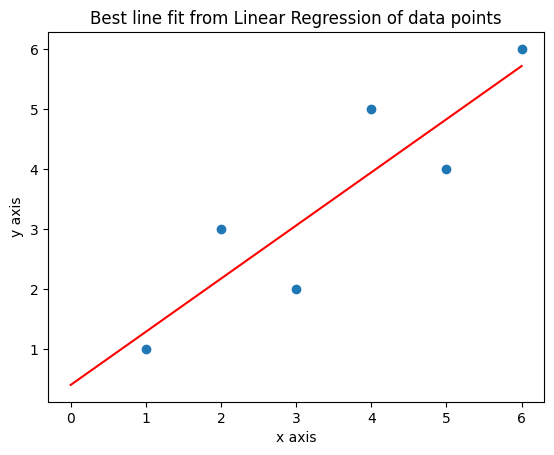

In [3]:
# Define the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 3, 2,5, 4, 6])
x_mu = np.average(x)
y_mu = np.average(y)

# Find optimal slope and intercept from analytical solution
beta_1 = sum((x - x_mu)*(y - y_mu)) / sum((x - x_mu)**2)
beta_0 = y_mu - beta_1 * x_mu

# plotting the data points and best line fit
x_pred = np.linspace(0, 6, 100)
y_pred = beta_0 + beta_1 * x_pred
plt.plot(x_pred, y_pred, "r-")
plt.scatter(x, y)
plt.title("Best line fit from Linear Regression of data points")
plt.xlabel("x axis")
plt.ylabel("y axis")
print(beta_0, beta_1)


#### Problem 2

Text(0, 0.5, 'Cost')

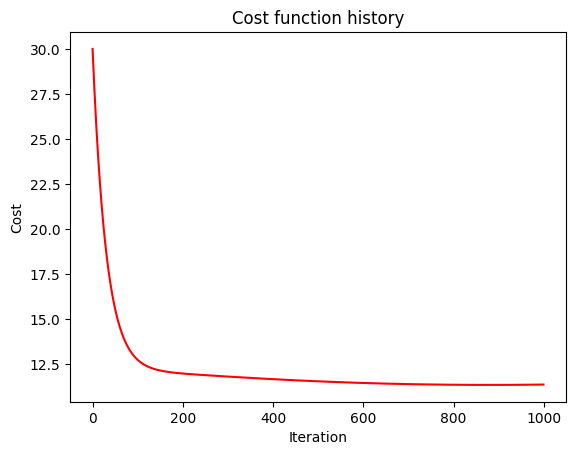

In [4]:
# Define the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 3, 2,5, 4, 6])
m = len(x) 

# Define learning rate and number of iterations
alpha = 0.001
n = 1000

# Define initial guess of beta_0 and beta_1
beta_0, beta_1 = 1, 1

# Init a cost log
cost = []
iteration = []

for i in range(n):
    # Define the loss as function of beta
    J = (1 / 2 * m) * sum((beta_0 + beta_1 * x - y)**2) 
    cost += [J]
    iteration += [i]

    # Define derivatives
    dJ_dbeta_0 = (1/m)*sum(((beta_0 + beta_1 * x - y)**2))
    dJ_dbeta_1 = (1/m)*sum(((beta_0*x + beta_1 * x**2 - y*x)))

    # Update the parameters from derivatives of J w.r.t. beta_i and setting to zero.
    beta_0 = beta_0 - alpha * dJ_dbeta_0
    beta_1 = beta_1 - alpha * dJ_dbeta_1

# Plot the cost history 
plt.plot(iteration, cost, "r-")
plt.title("Cost function history")
plt.xlabel("Iteration")
plt.ylabel("Cost")


10.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0
91.0


Text(0, 0.5, 'Cost')

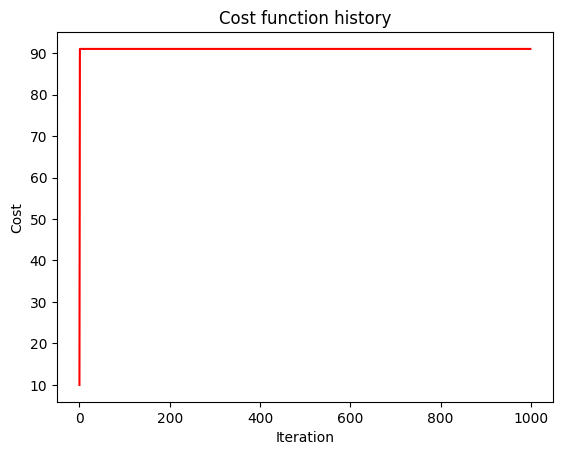

In [17]:
# fix
# Define the data points
y = np.array([1, 3, 2, 5, 4, 6])
x = np.array([[1 for _ in range(len(y))],
             [1, 2, 3, 4, 5, 6]])
m = len(x) 

# Define learning rate and number of iterations
alpha = 0.001
n = 1000

# Define initial guess of beta_0 and beta_1
betas = np.array([1, 1]).T

# Init a cost list
cost = []
iteration = []

for i in range(n):
    # Define the loss as function of beta
    J = (1 / 2 * m) * sum((betas @ x - y)**2) 
    cost += [J]
    iteration += [i]
    print(J)

    # Define derivatives
    dJ_dbeta_0 = (1/m)*sum(((betas @ x - y)**2))
    dJ_dbeta_1 = (1/m)*sum((((betas @ x)*x[1] - y*x[1])))

    # Update the parameters from derivatives of J w.r.t. beta_i and setting to zero.
    betas[0] = betas[0] - alpha * dJ_dbeta_0
    betas[1] = betas[1] - alpha * dJ_dbeta_1

# Plot the cost history 
plt.plot(iteration, cost, "r-")
plt.title("Cost function history")
plt.xlabel("Iteration")
plt.ylabel("Cost")


Text(0, 0.5, 'y axis')

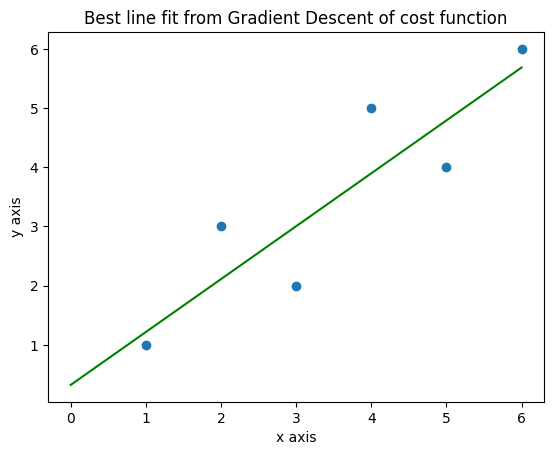

In [5]:

# Plot the Best line fit and the GD fit
x_pred = np.linspace(0, 6, 100)
y_pred = beta_0 + beta_1 * x_pred
plt.plot(x_pred, y_pred, "g-")
plt.scatter(x, y)
plt.title("Best line fit from Gradient Descent of cost function")
plt.xlabel("x axis")
plt.ylabel("y axis")



### Problem 3 - *Regularization*


245.94623971435854


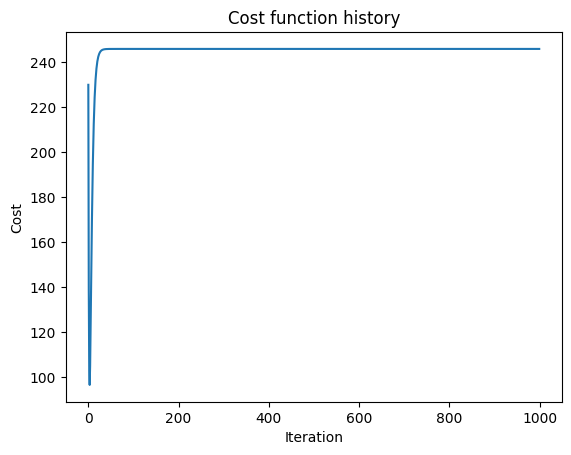

In [43]:
# Define the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 3, 2,5, 4, 6])
# same thing as problem 2
m = len(x) 

# Define learning rate and number of iterations
alpha = 0.001
lamb = 100
n = 1000

# Define initial guess of beta_0 and beta_1
beta_0, beta_1 = 1, 1

# Init a cost log
cost = []
iteration = []
costs = [[],[],[]]
iterations = [[],[],[]]

for i in range(n):
    # Define the loss as function of beta
    J = (1 / 2 * m) * sum((beta_0 + beta_1 * x - y)**2) + lamb * ( beta_0**2 + beta_1**2)
    cost += [J]
    iteration += [i]

    # Define derivatives
    dJ_dbeta_0 = (1/m)*sum(((beta_0 + beta_1 * x - y)**2)) + lamb*(2*beta_0)
    dJ_dbeta_1 = (1/m)*sum(((beta_0*x + beta_1 * x**2 - y*x))) + lamb*(2*beta_1)

    # Update the parameters from derivatives of J w.r.t. beta_i and setting to zero.
    beta_0 = beta_0 - alpha * dJ_dbeta_0
    beta_1 = beta_1 - alpha * dJ_dbeta_1

# Plot the cost history 
plt.plot(iteration, cost)
plt.title("Cost function history")
plt.xlabel("Iteration")
plt.ylabel("Cost")


In [49]:
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Perform gradient descent to learn the parameters theta for linear regression with intercept term.
    
    Parameters:
        X : numpy array
            The feature matrix of shape (m, n+1), where m is the number of examples and n is the number of features.
            The first column of X should be all ones, representing the intercept term.
        y : numpy array
            The target values of shape (m,).
        learning_rate : float, optional
            The learning rate for gradient descent. Default is 0.01.
        num_iterations : int, optional
            The number of iterations for gradient descent. Default is 1000.
    
    Returns:
        theta : numpy array
            The learned parameters of shape (n+1,).
        cost_history : list
            A list containing the cost at each iteration.
    """
    m = len(y)  # number of training examples
    n = X.shape[1] - 1  # number of features
    
    theta = np.zeros(n + 1)  # initialize parameters to zeros
    cost_history = []  # to store the cost at each iteration
    
    for _ in range(num_iterations):
        # Calculate predictions
        predictions = np.dot(X, theta)
        
        # Calculate error
        error = predictions - y
        
        # Calculate the gradient
        gradient = (1 / m) * np.dot(X.T, error)
        
        # Update parameters
        theta -= learning_rate * gradient
        
        # Calculate cost
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        cost_history.append(cost)
    
    return theta, cost_history

# Input data
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 3, 2, 5, 4, 6])

# Reshape x and add intercept term
X = np.vstack((np.ones(len(x)), x)).T

# Applying gradient descent
theta, cost_history = gradient_descent(X, y)

print("Learned parameters:")
print(theta)

print("\nCost history:")
print(cost_history)


Learned parameters:
[0.37051804 0.89260067]

Cost history:
[7.583333333333333, 5.446193287037038, 3.9376563286715536, 2.8728286491688704, 2.1212000776632935, 1.5906479801537738, 1.2161461625842087, 0.9517948744700383, 0.7651950629991606, 0.633477352790734, 0.5404990394958735, 0.4748655441349956, 0.42853382586912014, 0.3958265791831045, 0.3727363896350398, 0.3564345613693626, 0.34492441537768076, 0.3367965646838578, 0.33105617152715083, 0.3270010141582248, 0.32413541839066806, 0.32210950484798906, 0.3206763056880095, 0.31966149477580463, 0.31894202125547905, 0.3184310277244892, 0.3180672044924178, 0.3178072751189519, 0.31762069221399303, 0.3174858933856647, 0.3173876584429828, 0.3173152439362548, 0.31726106639340684, 0.3172197728618641, 0.31718758483608145, 0.317161835158585, 0.3171406411343707, 0.3171226737936163, 0.317106995022179, 0.3170929425976222, 0.31708004904010684, 0.31706798433203026, 0.3170565154857927, 0.31704547800407507, 0.31703475573463114, 0.3170242666504799, 0.317013952